# Credit card fraud detection capstone project

In [106]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import imblearn
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


#pd.set_option('display.max_rows',None)
pd.reset_option("display.max_rows")
alt.renderers.enable('jupyterlab')

RendererRegistry.enable('jupyterlab')

In [2]:
fraudPD = pd.read_csv('..\CreditCardFraudDetectionData\IEEE-CIS Fraud Detection-Transactions.csv')

In [3]:
pd.set_option('display.max_columns', None)
fraudPD.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [4]:
fraudPD.shape

(590540, 394)

In [5]:
#fraudPD.info(verbose=True, show_counts=True)

In [6]:
fraudPD['time'] = fraudPD['TransactionDT'].apply(lambda x: datetime.fromtimestamp(x).strftime("%A, %B %d, %Y %I:%M:%S"))

In [7]:
fraudPD.tail()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,time
590535,3577535,0,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,272.0,87.0,48.0,NaN,NaN,NaN,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,3.0,2.0,29.0,29.0,30.0,NaN,NaN,NaN,NaN,NaN,NaN,56.0,56.0,NaN,NaN,NaN,56.0,T,T,T,M0,T,F,F,F,T,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.0,47.950001,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,47.950001,0.000000,0.0,47.950001,0.0,0.0,47.950001,47.950001,47.950001,0.0,0.0,0.0,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Thursday, July 02, 1970 04:57:27"
590536,3577536,0,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,0.0,T,F,F,M0,F,T,F,F,F,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,

In [8]:
transGroup = fraudPD[['isFraud','TransactionID']].groupby(['isFraud'], dropna=False).agg('count').reset_index()
transGroup.columns = ['isFraud','count']
transGroup

,isFraud,count
0,0,569877
1,1,20663


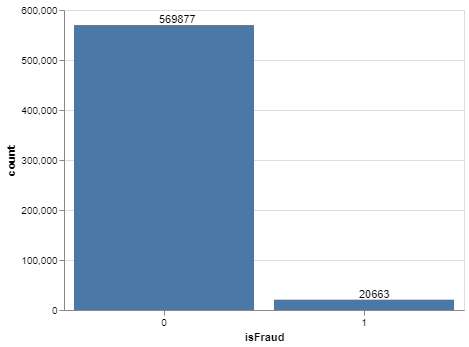

In [9]:
bar_chart=alt.Chart(transGroup).mark_bar().encode(alt.X('isFraud:N', axis=alt.Axis(labelAngle=0)), y='count:Q')
text_chart = bar_chart.mark_text(align='left', baseline='bottom', dx=-5).encode(text='count:Q')
(bar_chart + text_chart).properties(height=300, width=400)

In [10]:
productCDGroup = fraudPD[['ProductCD','TransactionID']].groupby(['ProductCD'], dropna=False).agg('count').reset_index()
productCDGroup.columns = ['ProductCD','count']
productCDGroup

,ProductCD,count
0,C,68519
1,H,33024
2,R,37699
3,S,11628
4,W,439670


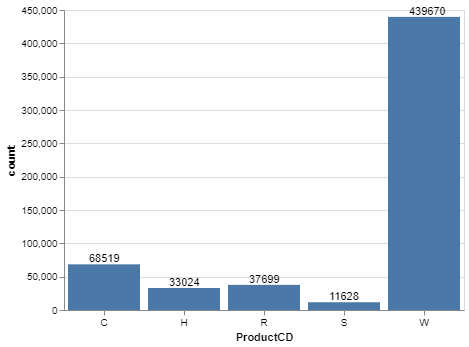

In [11]:
bar_chart=alt.Chart(productCDGroup).mark_bar().encode(alt.X('ProductCD:N', axis=alt.Axis(labelAngle=0)), y='count:Q')
text_chart = bar_chart.mark_text(align='left', baseline='bottom', dx=-15).encode(text='count:Q')
(bar_chart + text_chart).properties(height=300, width=400)

In [12]:
card4Group = fraudPD[['card4','TransactionID']].groupby(['card4'], dropna=False).agg('count').reset_index()
card4Group.columns = ['card4','count']
card4Group

,card4,count
0,american express,8328
1,discover,6651
2,mastercard,189217
3,visa,384767
4,NaN,1577


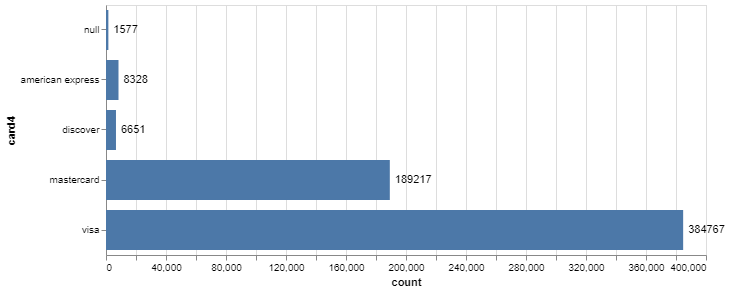

In [13]:
bar_chart=alt.Chart(card4Group).mark_bar(size=40).encode(x='count:Q',y='card4:N')
bar_text = bar_chart.mark_text(align='left', baseline='middle', dx=5).encode(text='count:Q')
(bar_chart + bar_text).properties(height=alt.Step(50), width=600)

In [14]:
card6Group = fraudPD[['card6','TransactionID']].groupby(['card6'], dropna=False).agg('count').reset_index()
card6Group.columns = ['card6','count']
card6Group

,card6,count
0,charge card,15
1,credit,148986
2,debit,439938
3,debit or credit,30
4,NaN,1571


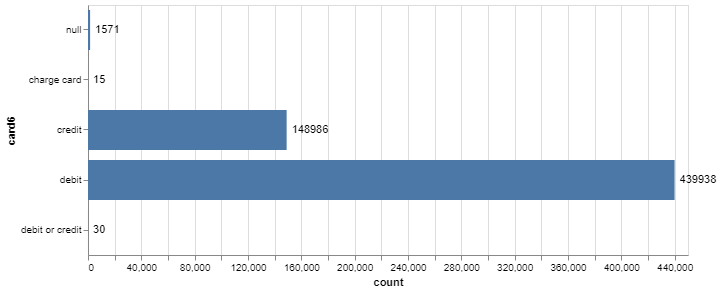

In [15]:
bar_chart=alt.Chart(card6Group).mark_bar(size=40).encode(x='count:Q',y='card6:N')
bar_text = bar_chart.mark_text(align='left', baseline='middle', dx=5).encode(text='count:Q')
(bar_chart + bar_text).properties(height=alt.Step(50), width=600)

In [16]:
card4Group = fraudPD[['card4','TransactionID','isFraud']].groupby(['card4','isFraud'], dropna=False).agg('count').reset_index()
card4Group.columns = ['card4','isFraud','count']
card4Group

,card4,isFraud,count
0,american express,0,8089
1,american express,1,239
2,discover,0,6137
3,discover,1,514
4,mastercard,0,182721
5,mastercard,1,6496
6,visa,0,371394
7,visa,1,13373
8,NaN,0,1536
9,NaN,1,41


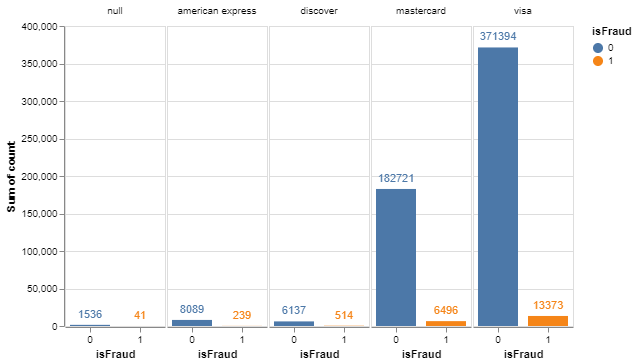

In [17]:
bar_chart = alt.Chart(card4Group).encode(
    alt.X("isFraud:O", axis=alt.Axis(labelAngle=0)),
    alt.Y("sum(count):Q"),
    alt.Color("isFraud:N"),
    alt.Text("sum(count):Q", format=".0f"),
).properties(height=alt.Step(50), width=100)

alt.layer(
    bar_chart.mark_bar(size=40),
    bar_chart.mark_text(dy=-10)
).facet(
    alt.Column("card4:N", title=None)
).configure_facet(spacing=0)


In [18]:
card6Group = fraudPD[['card6','TransactionID','isFraud']].groupby(['card6','isFraud'], dropna=False).agg('count').reset_index()
card6Group.columns = ['card6','isFraud','count']
card6Group

,card6,isFraud,count
0,charge card,0,15
1,credit,0,139036
2,credit,1,9950
3,debit,0,429264
4,debit,1,10674
5,debit or credit,0,30
6,NaN,0,1532
7,NaN,1,39


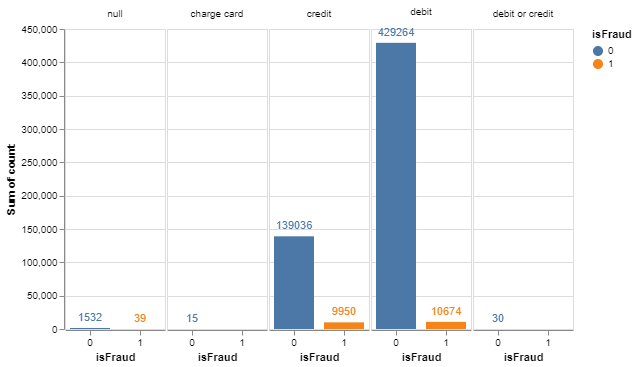

In [19]:
bar_chart = alt.Chart(card6Group).encode(
    alt.X("isFraud:O", axis=alt.Axis(labelAngle=0)),
    alt.Y("sum(count):Q"),
    alt.Color("isFraud:N"),
    alt.Text("sum(count):Q", format=".0f"),
).properties(height=alt.Step(50), width=100)

alt.layer(
    bar_chart.mark_bar(size=40),
    bar_chart.mark_text(dy=-10)
).facet(
    alt.Column("card6:N", title=None)
).configure_facet(spacing=0)

In [20]:
tAmountdf = fraudPD[['isFraud','TransactionAmt']].groupby('isFraud').mean().reset_index()

In [21]:
tAmountdf

,isFraud,TransactionAmt
0,0,134.511665
1,1,149.244779


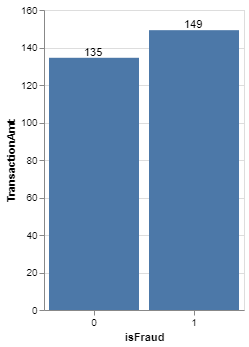

In [22]:
bar_chart=alt.Chart(tAmountdf).mark_bar().encode(
    x=alt.X('isFraud:N', axis=alt.Axis(labelAngle=0)),
    y='TransactionAmt:Q')

bar_text = bar_chart.mark_text(align='left', baseline='bottom', dx=-10).encode(text=alt.X('TransactionAmt:Q', format=".0f"))

(bar_chart + bar_text).properties(width=200)

In [23]:
fraudPD[['TransactionID','P_emaildomain','R_emaildomain']].value_counts().head(10)

TransactionID  P_emaildomain  R_emaildomain
2987010        gmail.com      gmail.com        1
3332109        gmail.com      gmail.com        1
3332088        anonymous.com  gmail.com        1
3332085        anonymous.com  anonymous.com    1
3332077        gmail.com      anonymous.com    1
3332072        yahoo.com      gmail.com        1
3332060        aol.com        gmail.com        1
3332053        verizon.net    verizon.net      1
3332041        anonymous.com  anonymous.com    1
3331941        gmail.com      anonymous.com    1
dtype: int64

In [24]:
fraudMelt=pd.melt(fraudPD[['TransactionID','P_emaildomain','R_emaildomain']], 
        id_vars=['TransactionID'], 
        value_vars=['P_emaildomain', 'R_emaildomain'], ignore_index=False)

fraudMelt=fraudMelt[['variable','value']].value_counts().reset_index()
fraudMelt.columns = ['stakeholder','domain','count']

fraudGrp = fraudMelt[['domain','count']].groupby('domain').sum().sort_values('count', ascending=False).head(5)
fraudGrp

fraudMelt=fraudMelt.merge(fraudGrp, how='inner', on='domain')[['stakeholder','domain','count_x']]
fraudMelt.columns = ['stakeholder','domain','count']

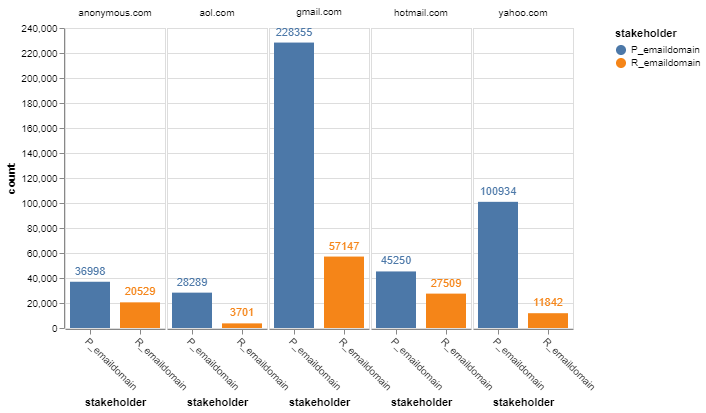

In [25]:
bar_chart = alt.Chart(fraudMelt).encode(
    alt.X("stakeholder:O", axis=alt.Axis(labelAngle=45)),
    alt.Y("count:Q"),
    alt.Color("stakeholder:N"),
    alt.Text("count:Q", format=".0f"),
).properties(height=alt.Step(50), width=100)

alt.layer(
    bar_chart.mark_bar(size=40),
    bar_chart.mark_text(dy=-10)
).facet(
    alt.Column("domain:N", title=None)
).configure_facet(spacing=0)

In [26]:
fraudPD.shape

(590540, 395)

In [27]:
#fraudPD.isna().sum()

In [28]:
fraudPD[['addr2', 'TransactionID']].groupby('addr2').count().sort_values(by='TransactionID', ascending=False).head(10)

,TransactionID
addr2,
87.0,520481
60.0,3084
96.0,638
32.0,91
65.0,82
16.0,55
31.0,47
19.0,33
26.0,25


In [223]:
notnaFraud=fraudPD[['isFraud',
                'TransactionAmt',
                'ProductCD',
                'card1',
                'card4',
                'card6',
                'addr1',
                'addr2',
                'P_emaildomain']].dropna()

In [224]:
notnaFraud.shape

(431503, 9)

In [225]:
notnaFraud.isna().sum()

isFraud           0
TransactionAmt    0
ProductCD         0
card1             0
card4             0
card6             0
addr1             0
addr2             0
P_emaildomain     0
dtype: int64

In [226]:
notnaFraud[['isFraud']].value_counts()

isFraud
0          421091
1           10412
dtype: int64

In [227]:
notnaFraud.head()

,isFraud,TransactionAmt,ProductCD,card1,card4,card6,addr1,addr2,P_emaildomain
1,0,29.0,W,2755,mastercard,credit,325.0,87.0,gmail.com
2,0,59.0,W,4663,visa,debit,330.0,87.0,outlook.com
3,0,50.0,W,18132,mastercard,debit,476.0,87.0,yahoo.com
4,0,50.0,H,4497,mastercard,credit,420.0,87.0,gmail.com
5,0,49.0,W,5937,visa,debit,272.0,87.0,gmail.com


In [228]:
#notnaFraud[notnaFraud.duplicated()]

In [229]:
notnaFraud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 431503 entries, 1 to 590539
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   isFraud         431503 non-null  int64  
 1   TransactionAmt  431503 non-null  float64
 2   ProductCD       431503 non-null  object 
 3   card1           431503 non-null  int64  
 4   card4           431503 non-null  object 
 5   card6           431503 non-null  object 
 6   addr1           431503 non-null  float64
 7   addr2           431503 non-null  float64
 8   P_emaildomain   431503 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 32.9+ MB


In [230]:
factFraud=notnaFraud[['ProductCD','card4','card6','P_emaildomain']].apply(lambda x : pd.factorize(x)[0])
factFraud.shape

(431503, 4)

In [231]:
fraud=pd.concat([notnaFraud[['TransactionAmt','card1','addr1','addr2']], factFraud], axis=1)

In [232]:
fraud.head()

,TransactionAmt,card1,addr1,addr2,ProductCD,card4,card6,P_emaildomain
1,29.0,2755,325.0,87.0,0,0,0,0
2,59.0,4663,330.0,87.0,0,1,1,1
3,50.0,18132,476.0,87.0,0,0,1,2
4,50.0,4497,420.0,87.0,1,0,0,0
5,49.0,5937,272.0,87.0,0,1,1,0


<Axes: >

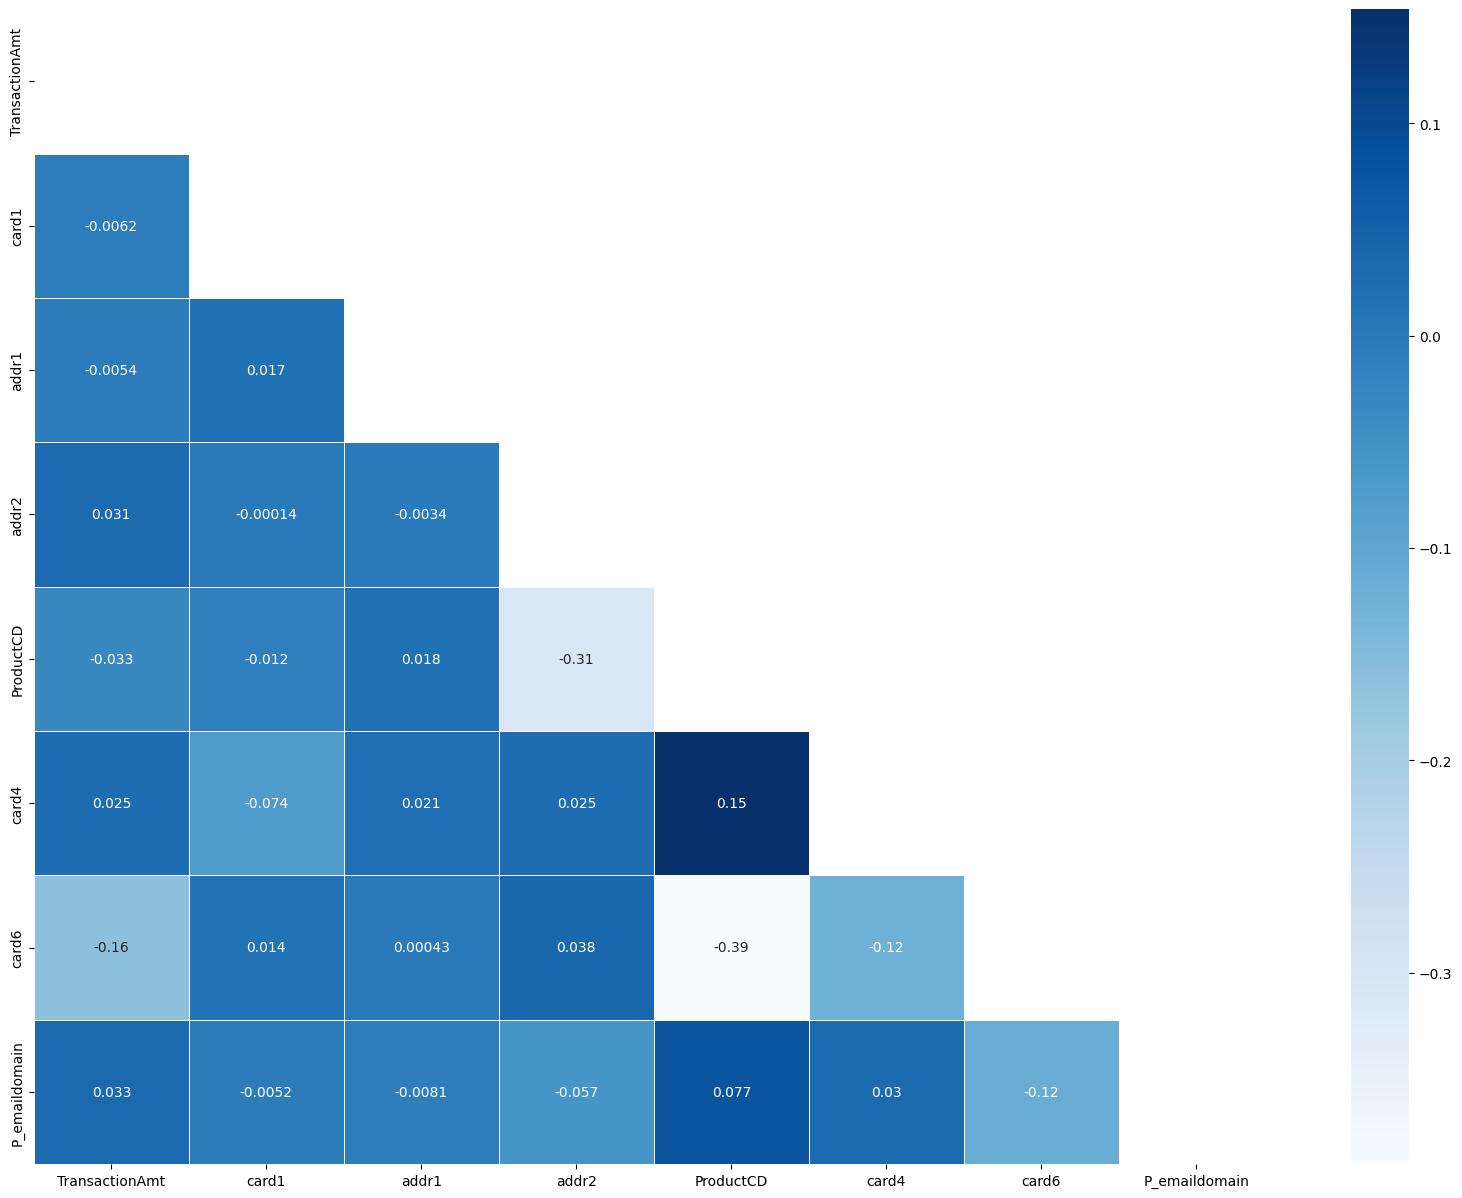

In [233]:
plt.subplots(figsize=(20,15))
sns.heatmap(fraud.corr(), cmap="Blues", annot=True, linewidths=.5, mask=np.triu(fraud.corr()))

In [234]:
fraud=pd.concat([fraud, notnaFraud[['isFraud']]], axis=1)

In [235]:
fraud.head()

,TransactionAmt,card1,addr1,addr2,ProductCD,card4,card6,P_emaildomain,isFraud
1,29.0,2755,325.0,87.0,0,0,0,0,0
2,59.0,4663,330.0,87.0,0,1,1,1,0
3,50.0,18132,476.0,87.0,0,0,1,2,0
4,50.0,4497,420.0,87.0,1,0,0,0,0
5,49.0,5937,272.0,87.0,0,1,1,0,0


In [290]:
my_standard_scaler = StandardScaler()

my_standard_scaler.fit(fraud[['TransactionAmt','card1','addr1','addr2']])

scaledfraud = pd.DataFrame(my_standard_scaler.transform(fraud[['TransactionAmt','card1','addr1','addr2']])).reset_index()

tmpFraud = fraud[['ProductCD','card4','card6','P_emaildomain','isFraud']].reset_index()

nfraud=pd.concat([scaledfraud, tmpFraud], ignore_index=True, axis=1)

nfraud.columns = ['index','TransactionAmt','card1','addr1','addr2', 'index1', 'ProductCD','card4','card6','P_emaildomain','isFraud']

nfraud = nfraud[['TransactionAmt','card1','addr1','addr2', 'ProductCD','card4','card6','P_emaildomain','isFraud']]

In [291]:
nfraud.head()

,TransactionAmt,card1,addr1,addr2,ProductCD,card4,card6,P_emaildomain,isFraud
0,-0.471192,-1.461040,0.340418,0.0807,0,0,0,0,0
1,-0.356177,-1.070281,0.389651,0.0807,0,1,1,1,0
2,-0.390682,1.688179,1.827240,0.0807,0,0,1,2,0
3,-0.390682,-1.104278,1.275836,0.0807,1,0,0,0,0
4,-0.394516,-0.809365,-0.181446,0.0807,0,1,1,0,0


In [295]:
X=nfraud[['TransactionAmt','card1','addr1','addr2','ProductCD','card4','card6','P_emaildomain']]
y=nfraud['isFraud']

In [296]:
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)

In [297]:
x_rus.shape

(20824, 8)

In [298]:
y_rus.shape

(20824,)

In [299]:
X_train, X_test, y_train, y_test = train_test_split(x_rus, y_rus, test_size=0.20, random_state=17)

In [300]:
logistic_regression_model = LogisticRegression()

logistic_regression_model.fit(X_train, y_train)

LogisticRegression()

In [301]:
intercept = logistic_regression_model.intercept_

coefficient = logistic_regression_model.coef_[0]

print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficient}')

Intercept: [0.30278389]
Coefficients: [ 0.25303469 -0.03051256  0.0986427  -0.07471138  0.23198779  0.1308692
 -0.70371916 -0.01880888]


In [302]:
model_prediction_new = logistic_regression_model.predict(X_test)

In [303]:
test_accuracy=accuracy_score(y_test, model_prediction_new)
print(f"Test set accuracy: {test_accuracy}")

Test set accuracy: 0.6297719087635054


In [304]:
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train, y_train)

# Score the model on the test set
test_predictions = KNN_model.predict(X_test)
test_accuracy = accuracy_score(test_predictions, y_test)

print(f"Test set accuracy: {test_accuracy}")

Test set accuracy: 0.7447779111644658


In [305]:
DT_model = DecisionTreeClassifier(max_depth=2)
DT_model.fit(X_train, y_train);
test_predictions = DT_model.predict(X_test)

test_accuracy = accuracy_score(test_predictions, y_test)
print(f"Test set accuracy is:  {test_accuracy}")

Test set accuracy is:  0.6386554621848739
